In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [4]:
# Loading in the compressed data
Flattenedfilename = 'Segments5_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments5_compr_flat_filt.npz
Segments5_compr_flat_filt_roughness.jpg
4
2019-07-02/case2.0 (calibration)


In [5]:
# Histogram accumulation
countslist = []
accumlist = [] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .04
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 10
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3]
Plotting segments [0, 1, 2, 3]
Z2 ranging from 0 to 0.04
Max number of bins specified is 10
Sturges rule says maxbins = 11
Using nbins =  10
Using levels = 3 for uncertainty analysis


Original =  1053
4 0 264 [134  52  40  14  10   7   4   1   1]
4 1 263 [127  60  36  11  14   6   2   4   1]
4 2 263 [120  69  27  19   9   7   6   2   0]
4 3 263 [121  70  26  21  11   4   3   1   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007322849286805705
statsigma =  0.08557364832006233


<IPython.core.display.Javascript object>


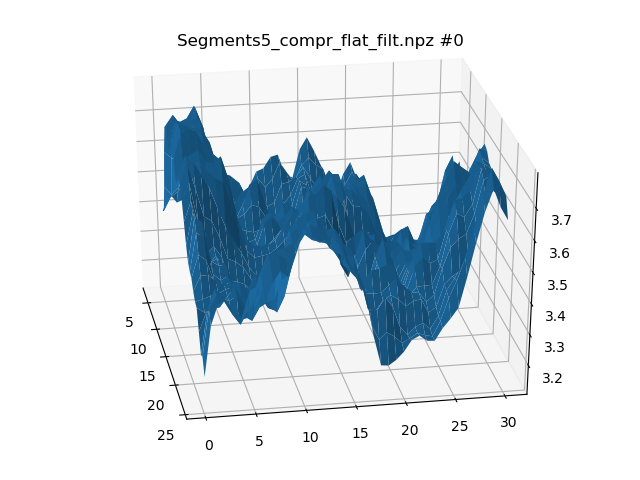

std dev of height =  0.12442765790362006
integral =  0.003363133248190719


<IPython.core.display.Javascript object>


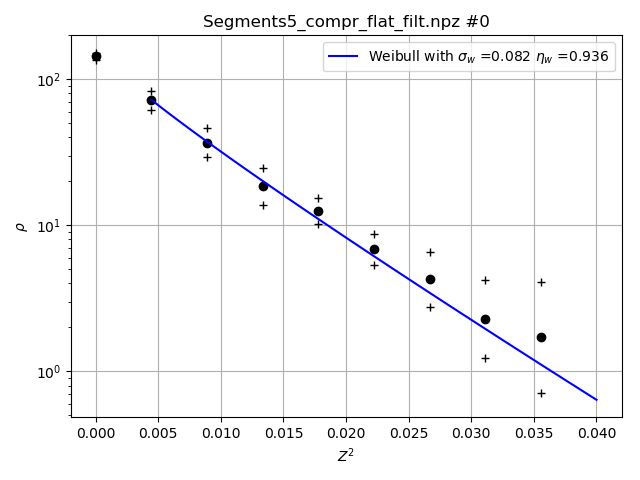

[134.64857367  61.51567514  29.26731002  13.83231687  10.13803177
   5.32616815   2.76063985   1.23153865   0.71553665]
Original =  1064
4 0 266 [49 33 25 15 11 17 15  9  5]
4 1 266 [40 26 28 25 22 14 12 10 11]
4 2 266 [41 29 25 21 18 15 10 14  8]
4 3 266 [42 34 27 16 21  8 11 11 12]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03654954090624147
statsigma =  0.1911793422581045


<IPython.core.display.Javascript object>


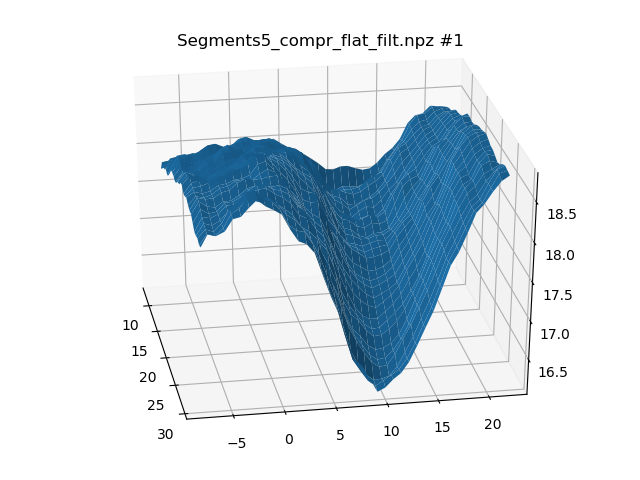

std dev of height =  0.6009083269387271
integral =  0.003811263318112633


<IPython.core.display.Javascript object>


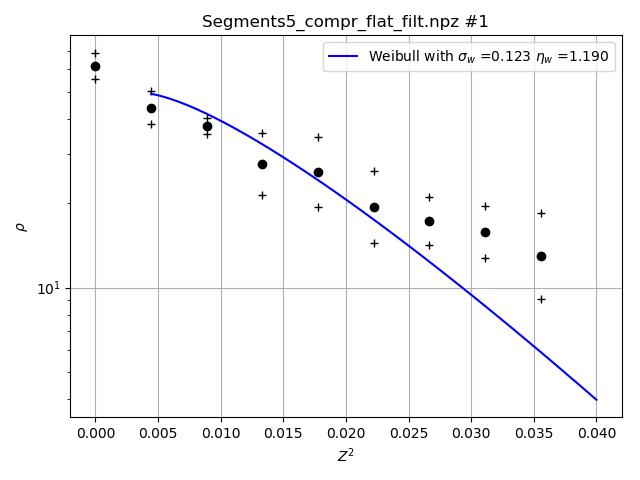

[55.48761631 38.27271431 35.31360052 21.45159927 19.43245007 14.43144433
 14.18284296 12.79400175  9.09666121]
Original =  1216
4 0 304 [68 62 32 29 25 22  9 10  6]
4 1 304 [87 52 41 28 19 13 12 10  6]
4 2 304 [80 68 37 27 23 11 13  6 10]
4 3 304 [89 54 47 33 25 14  7  8  1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.017607149112812588
statsigma =  0.13269193311129576


<IPython.core.display.Javascript object>


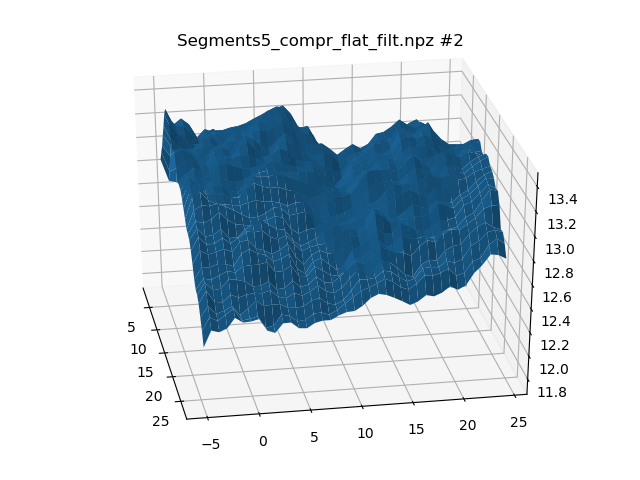

std dev of height =  0.33508416794516555
integral =  0.0037330873308733083


<IPython.core.display.Javascript object>


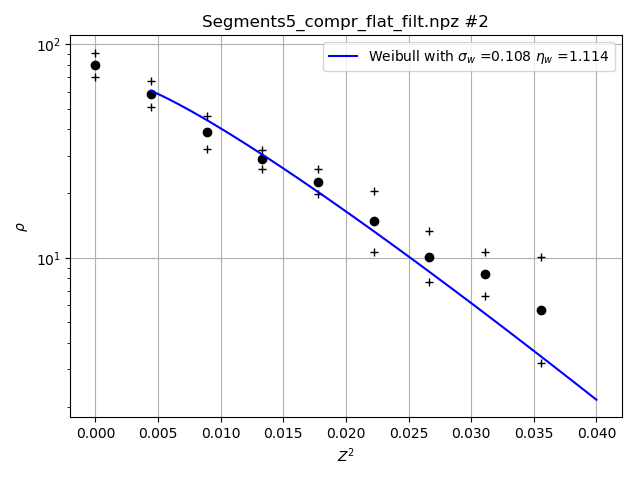

[70.1835269  50.68359565 32.48470987 26.09220509 19.80647168 10.68878328
  7.65822618  6.61137741  3.21004899]
Original =  1216
4 0 304 [60 48 34 19 29 10 13 10  8]
4 1 304 [62 50 41 24 22 13 12 11  4]
4 2 304 [55 45 50 32 27 16  5  9  5]
4 3 304 [72 41 38 27 20  7 12  5  7]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03455629083348571
statsigma =  0.1858932242807298


<IPython.core.display.Javascript object>


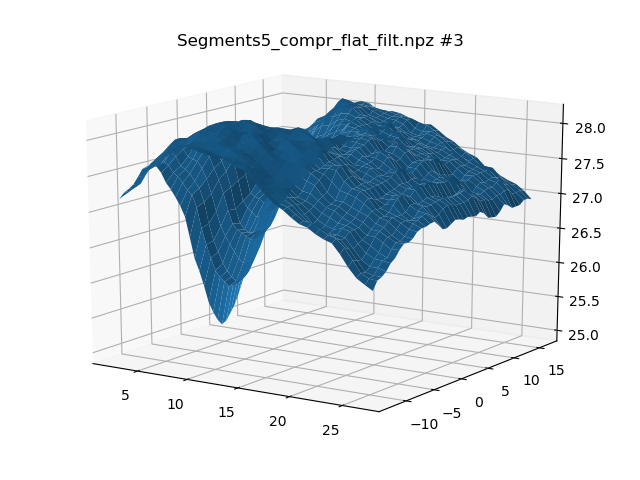

std dev of height =  0.5398394706987791
integral =  0.0038011075762931544


<IPython.core.display.Javascript object>


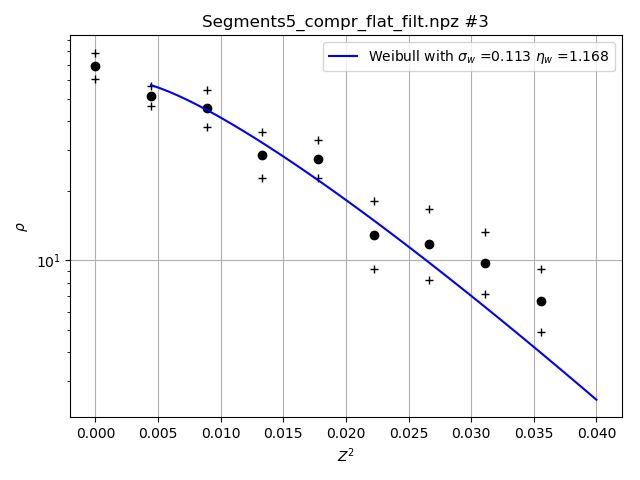

[61.05311022 46.56718224 37.87501952 22.64198057 22.66552067  9.13468388
  8.23257899  7.17258748  4.90222379]


In [6]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)
    
    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  1216
4 0 304 [60 48 34 19 29 10 13 10  8]
4 1 304 [62 50 41 24 22 13 12 11  4]
4 2 304 [55 45 50 32 27 16  5  9  5]
4 3 304 [72 41 38 27 20  7 12  5  7]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03455629083348571
statsigma =  0.1858932242807298
integral =  0.0038011075762931544
eta_W =  1.041697112784387
sigma_W =  0.10529321737101863


<IPython.core.display.Javascript object>


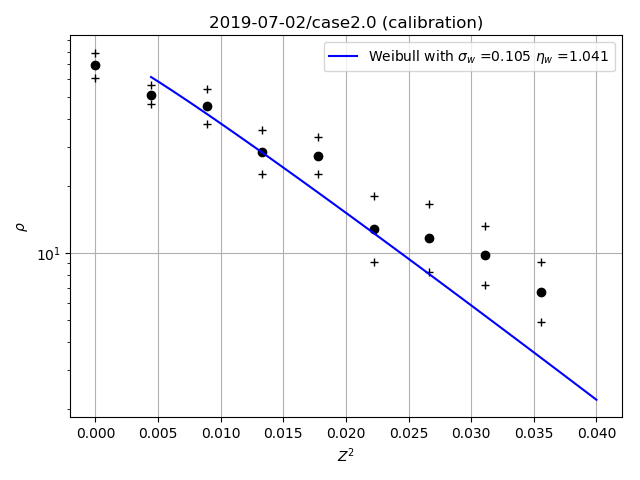

[61.05311022 46.56718224 37.87501952 22.64198057 22.66552067  9.13468388
  8.23257899  7.17258748  4.90222379]


In [7]:
# Sum up the accumulated informaion
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [8]:
plt.savefig(Roughnessfilename)